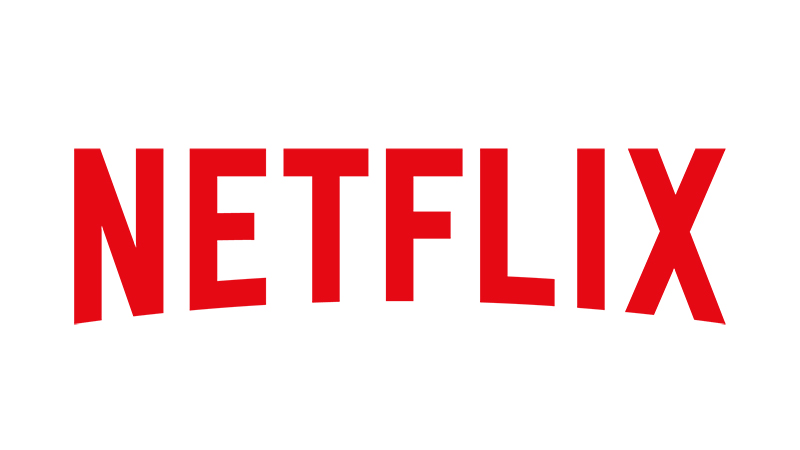


**Netflix is one of the most content rich online streaming platform which is home to some of the best movies, documentaries and tv shows. Some of us pay for the content we consume on Netflix, and some of us dont ;)**

**Here is the basic data analysis and visualizations of Netflix's large database of contents.**

**Table of Content:-**
* [Basic Data Cleaning](#section-clean)
* [Movie to TV series Content Ratio](#section-movie-ser)
* [Top 10 genres of content on Netflix](#section-genre)
* [IMDB Dataset import and data merging](#section-import-merge)
* [Release Year wise distribution of Netflix's content](#section-release)
* [Adult/Non-Adult content ratio on Netflix](#section-adult)
* [Top Movie and TV Series of every year](#section-rating)
* [How long does the movies and TV series ran for?](#section-long)

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the data**

In [ ]:
netflix_data = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
netflix_data.head()

<a id="section-clean"></a>
Checking the length of the dataset and performing basic cleaning like dropping null values, duplicates, etc.

In [ ]:
len(netflix_data)

In [ ]:
netflix_data.isna().any()

In [ ]:
netflix_data.drop(['show_id', 'description'], axis = 1, inplace = True)

In [ ]:
netflix_data.drop_duplicates(inplace = True)

In [ ]:
#Converting the values of title column to lower case for easy data manipulation and merging
netflix_data['title'] = netflix_data.title.str.lower()

In [ ]:
#Taking only the non-null rows of the dataframe
netflix_data = netflix_data[netflix_data.date_added.notna()]

In [ ]:
netflix_data.head()

**Let's do some visualizations now, shall we?**

<a id="section-movie-ser"></a>
# Movies to TV Show Content Ratio on Netflix

In [ ]:
type_pie = netflix_data['type'].value_counts().reset_index()
type_pie.columns = ['Entertainment Category', 'Count']

fig_type = px.pie(type_pie, values='Count', 
                  names='Entertainment Category', 
             width=500, height=500)
fig_type.show()

<a id="section-genre"></a>
# Netflix Content Ratio by Genre

In [ ]:
type_genres = netflix_data['listed_in'].value_counts().reset_index()
type_genres.columns = ['Genres', 'Count']

fig_genres = px.pie(type_genres.head(10), values='Count', title='Top 10 genres with the highest content on Netflix', 
                  names='Genres', 
             width=800, height=500)
fig_genres.show()

<a id="section-import-merge"></a>
**Now we're going to import some new datasets which contains IMDB ratings and some new observations for further analysis**

In [ ]:
basic_data = pd.read_csv('../input/imdb-rating-and-other-stuff/basic.tsv', sep = '\t')
basic_data.head()

**Cleaning the dataset a little bit**

In [ ]:
basic_data = basic_data.drop(['originalTitle', 'endYear', 'runtimeMinutes'], axis = 1)

In [ ]:
rating_data = pd.read_csv('../input/imdb-rating-and-other-stuff/data.tsv', sep = '\t')
rating_data.head()

In [ ]:
rating_data.isna().any()

****Now we're gonna merge the basic_data and rating_data datasets on 'tconst' column****

In [ ]:
merge_rating_basic = pd.merge(basic_data, rating_data, how = 'inner', on = 'tconst')
merge_rating_basic.head()

In [ ]:
merge_rating_basic.isna().any()

In [ ]:
merge_rating_basic = merge_rating_basic[['primaryTitle', 'isAdult', 'averageRating', 'numVotes']]
merge_rating_basic.rename(columns = {'primaryTitle' : 'title'}, inplace = True)
merge_rating_basic.head()

****Now we're going to merge the original netflix dataset with this IMDB dataset to the average ratings of Movies and Tv series present in Netflix****

In [ ]:
merge_rating_basic['title'] = merge_rating_basic['title'].str.lower()
netflix_data_rating = pd.merge(netflix_data, merge_rating_basic, how = 'inner', on = 'title')

In [ ]:
netflix_data_rating.info()

In [ ]:
netflix_data_rating.drop(['cast', 'country', 'rating', 'director'], axis = 1, inplace = True)

In [ ]:
netflix_data_rating.info()

****Back to the visualizations !!!****

<a id="section-release"></a>
# Release Year-wise distribution of Netflix's Content

In [ ]:
type_year = netflix_data_rating['release_year'].value_counts().reset_index()
type_year.columns = ['Release Year', 'Count']

year_wise = px.bar(type_year, x = 'Count', y = 'Release Year', color = 'Release Year', hover_name= 'Release Year',
                   orientation= 'h', height=600, width = 700)

year_wise.update_layout(title = {'text':"Release Year wise distribution of Netflix's content",'y':0.98,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Count",
        yaxis_title="Release Year",
                     font=dict(
            family="Courier New, monospace",
            size=16,
            color="RebeccaPurple"
        ))
year_wise.show();

In [ ]:
#Keeping just the year in the date_added column
netflix_data_rating['date_added'] = netflix_data_rating['date_added'].str.split(',', n = 1,expand = True).drop(0, axis = 1)
netflix_data_rating.date_added = netflix_data_rating.date_added.astype(int)

<a id="section-adult"></a>
# Adult/Non-Adult Content Ratio

In [ ]:
netflix_data_rating.isAdult.replace([0,1], ['Non Adult', 'Adult'], inplace = True)
type_adult = netflix_data_rating['isAdult'].value_counts().reset_index()
type_adult.columns = ['Type of Content', 'Count']

fig_adult = px.pie(type_adult, values='Count', title='Adult/Non-Adult content ratio on Netflix', 
                  names='Type of Content', 
             width=500, height=500)
fig_adult.show()

****We see from the above pie-chart that most of the content on Netflix is Non-Adult****

In [ ]:
netflix_movies = netflix_data_rating[netflix_data_rating['type'] == 'Movie']
netflix_tv = netflix_data_rating[netflix_data_rating['type'] == 'TV Show']

In [ ]:
netflix_movies.sort_values(by = ['date_added', 'averageRating', 'numVotes'], ascending = [False,False, False], inplace = True)

In [ ]:
netflix_movies.drop_duplicates(subset = 'title', inplace = True)

In [ ]:
netflix_tv.sort_values(by = ['date_added','averageRating', 'numVotes'], ascending = [False, False, False], inplace = True)

In [ ]:
netflix_tv.drop_duplicates(subset = 'title', inplace = True)

<a id="section-rating"></a>
# Top Movie and TV Series of every year(year added) based on IMDB average ratings and number of votes

In [ ]:
l = []
for year in range(2008, 2021):
    new_data1 = netflix_movies[netflix_movies.date_added == year].iloc[0]
    #print(new_data1)
    l.append(new_data1)
    new_data2 = pd.DataFrame(l, columns = ['type', 'title', 'date_added', 'release_year', 'duration', 'listed_in', 'isAdult',
                                           'averageRating', 'numVotes'])

In [ ]:
new_data2 = new_data2.reset_index()
new_data2.drop('index', axis = 1, inplace = True)
#new_data2.sort_values('date_added', ascending = False, inplace = True)
new_data2.title = new_data2.title.str.title()
new_data2

In [ ]:
top_movie = px.bar(new_data2, x = 'averageRating', y = 'date_added', color = 'date_added', hover_name= 'title',
                   orientation= 'h', height=600, width = 700)

top_movie.update_layout(title = {'text':"Top Movie of every year(year added)",'y':0.98,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="IMDB average rating",
        yaxis_title="Year when added on Netflix",
                     font=dict(
            family="Courier New, monospace",
            size=16,
            color="RebeccaPurple"
        ))
top_movie.show();

In [ ]:
li = []
for year_tv in list([2008]) + list(range(2012,2021)):
    new_data3 = netflix_tv[netflix_tv['date_added'] == year_tv].iloc[0]
    #print(new_data1)
    li.append(new_data3)
    new_data4 = pd.DataFrame(li, columns = ['type', 'title', 'date_added', 'release_year', 'duration', 'listed_in', 'isAdult',
                                           'averageRating', 'numVotes'])

In [ ]:
new_data4 = new_data4.reset_index()
new_data4.drop('index', axis = 1, inplace = True)
#new_data2.sort_values('date_added', ascending = False, inplace = True)
new_data4.title = new_data4.title.str.title()
new_data4

In [ ]:
top_show = px.bar(new_data4, x = 'averageRating', y = 'date_added', color = 'date_added', hover_name= 'title',
                   orientation= 'h', height=600, width = 700)

top_show.update_layout(title = {'text':"Top TV series of every year(year added)",'y':0.98,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="IMDB average rating",
        yaxis_title="Year when added on Netflix",
                     font=dict(
            family="Courier New, monospace",
            size=16,
            color="RebeccaPurple"
        ))
top_show.show();

# As per the data, there was no TV series added from year 2009 to 2011 which can't be true

<a id="section-long"></a>
# How long did the movies and tv series ran for on Netflix?

In [ ]:
netflix_movies_1 = netflix_movies.copy()
netflix_movies_1.duration = netflix_movies.duration.str.split(' ', n=1, expand = True).drop(1, axis = 1)
netflix_movies_1.duration = netflix_movies_1.duration.astype(int)
netflix_movies_1.sort_values('duration', inplace = True)
netflix_movies_1.head()

In [ ]:
fig_dur_movie = px.histogram(netflix_movies_1, x="duration", color="duration", nbins = 350)
fig_dur_movie.update_layout(title = {'text':"How long did the movie last ?",'y':0.95,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Movie Running Time(in min)",
        yaxis_title="Count",
                     font=dict(
            family="Courier New, monospace",
            size=12,
            color="RebeccaPurple"
        ))
fig_dur_movie.show()

****As we see above, most of the movie running time is clustered between 80 to 130 minutes****

In [ ]:
netflix_tv_1 = netflix_tv.copy()
netflix_tv_1.duration = netflix_tv_1.duration.str.split(' ', n=1, expand = True).drop(1, axis = 1)
netflix_tv_1.duration = netflix_tv_1.duration.astype(int)
netflix_tv_1.sort_values('duration', inplace = True)
netflix_tv_1['Numseason'] = 'Season'
netflix_tv_1.duration = netflix_tv_1.duration.astype(str)
netflix_tv_1['duration'] = netflix_tv_1['Numseason'].str.cat(netflix_tv_1['duration'], sep = ' ')
netflix_tv_1.head()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('duration', data = netflix_tv_1, facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
plt.title('How many seasons does the TV series last?')
plt.xlabel('Number of seasons')
plt.ylabel('Count')
plt.show()

****We can see here that most of the shows lasted just 1 season.****

# So here it is, the Top Rated Movies and TV shows on Netflix along with some other cool analysis.

# If you like this notebook, don't forget to upvote, Adios :)